## Multiple Linear Regression Model 

## <font color=blue>Prediction of Demand for Shared Bikes

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes**.

* **How well those variables describe the bike demands**

In [1]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the bikes rental  dataset into 'bikes' dataframe

bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# looking at the shape of the bikes dataset
bikes.shape

(730, 16)

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Finding out the datatype of the columns in the bikes dataset:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


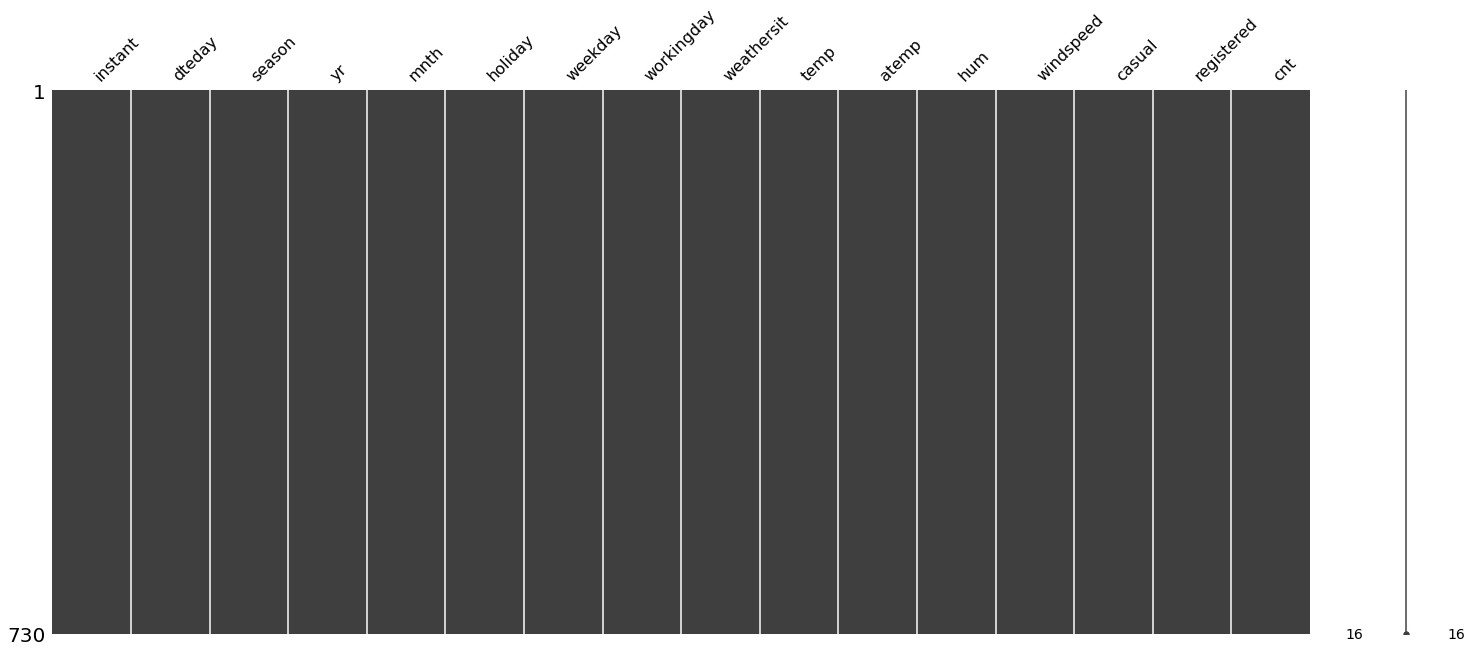

In [7]:
# To check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bikes)

We see there are no missing values in our bikes dataset.

#### In our bikes dataset , we have the following types of columns:
* **Categorical columns: <font color=blue>season , month , weathersit , weekday</font>**
* **Continuous/Numerical columns : <font color=blue>windspeed , hum , temp , atemp , count</font>**
* **Binary/Dichotomous columns:<font color=blue> yr , holiday , workingday</font>**

#### In our bikes dataset,we have some unnecessary columns like:<font color=blue> instant , dteday , casual , registered </font>, so we are going to drop these columns. 

In [8]:
# Dropping the columns : instant,dteday,casual,registered

cols=["instant","dteday","casual","registered"]

bikes=bikes.drop(columns=cols,axis=1)

#### Renaming columns :

In [9]:
# Renaming some columns for more clearity 

bikes.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

### Mapping the Categorical columns to their actual category names :

#### 1 . Season column mapping as:<br>
* 1: spring 
* 2: summer 
* 3: fall 
* 4: winter

In [10]:
# Mapping the categorical column : season into its categories

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

bikes.season=[season_cat[item] for item in bikes.season]

#### 2 . Weathersit column mapping as:<br>
* 1: clear 
* 2: mist & cloudy 
* 3: light rain & snow 
* 4: heavy rain & snow

In [11]:
# Mapping the categorical column : weathersit into its categories

weather_cat={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

bikes.weathersit=[weather_cat[item] for item in bikes.weathersit]

#### 3 . Month column mapping as:<br>
* 1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec

In [12]:
# Mapping the categorical column : month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bikes.month=[month_cat[item] for item in bikes.month]

#### 4.Weekday column mapping as:
* 0: Sunday
* 1: Monday 
* 2: Tuesday 
* 3: Wednesday
* 4: Thursday
* 5: Friday
* 6: Saturday

In [13]:
# Mapping the categorical column : weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bikes.weekday=[wkday_cat[item] for item in bikes.weekday]

#### 5.Year column mapping as:
* 0: 2018
* 1: 2019 

In [14]:
# Mapping the categorical column : Year into its categories

yr_cat={0: '2018',1: '2019'}

bikes.year=[yr_cat[item] for item in bikes.year]

## Exploratory Data Analysis :

### Analysis of various variables w.r.t  'count' ie., target variable through Visualization:

#### 1. Season :

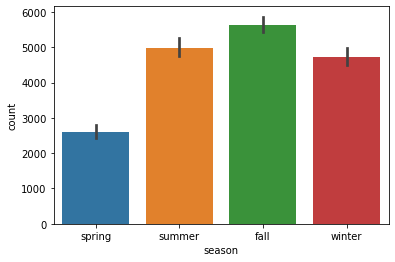

In [15]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='count',data=bikes)

#### Observation: Bike rental counts are more during the Fall season.

#### 2. Year :
* 0: 2018
* 1: 2019

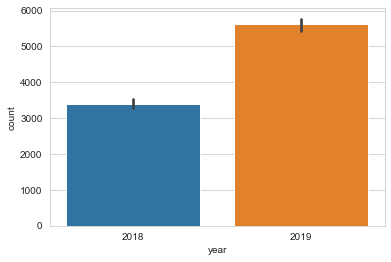

In [16]:
# Analysing the demand in year 2018 and 2019
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='count',data=bikes)

#### Observation: Bike rental counts are more in the year 2019 as compared to 2018.

#### 3. Month :

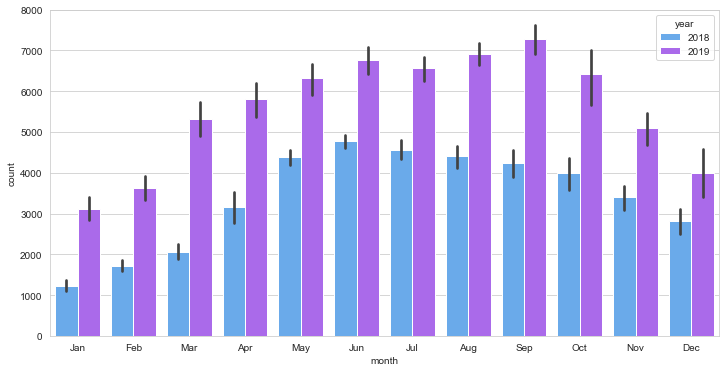

In [17]:
# Analysing the demand in various months
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=bikes,hue='year',palette='cool')

#### Observation: Bike rental counts are more in the month of Sep 2019.

#### 4. Weather :

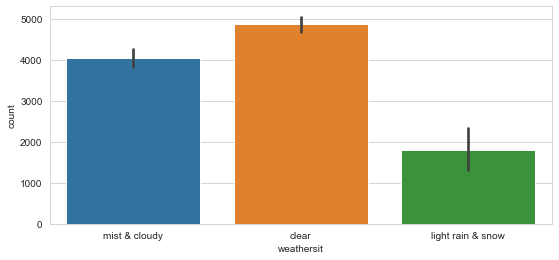

In [18]:
# Analysing the demand in various weathers
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='count',data=bikes)

#### Observation: Bike rental counts are more in the Clear weather .

#### 5. Weekday :

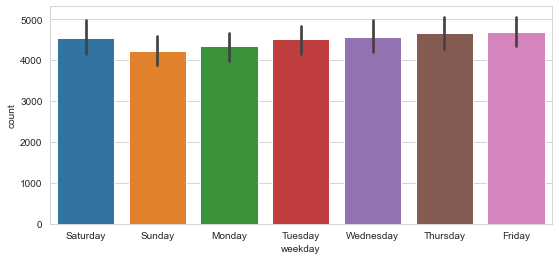

In [19]:
# Analysing the demand in various weekdays
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='count',data=bikes)

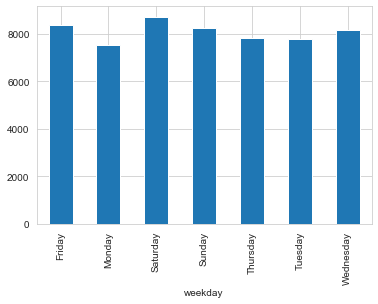

In [20]:
bikes.groupby('weekday')['count'].max().plot(kind='bar')

#### Observation: Bike rental counts are more on Saturday and Friday .

#### 6. Working day :  
* 0 : holiday or weekend
* 1 : neither holiday nor weekend ie., working day

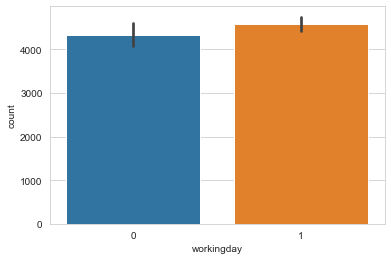

In [21]:
# Analysing the demand based on workingday or not a workingday
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='count',data=bikes)

#### Observation: Bike rental counts are more on working days .

### 7. Visualizing the continuous variables 'temp','atemp','humidity','windspeed' w.r.t 'count ' variable through a pairplot.

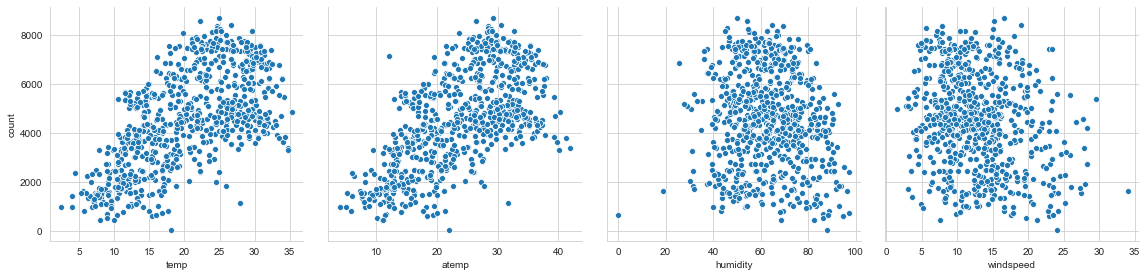

In [22]:
sns.pairplot(bikes, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4, aspect=1 )
plt.show()

#### Observation: 
* **Bike rental counts show a `positive correlation` with `temp` and `atemp`** and therefore **bike rental counts increase at higher temperatures and vice-versa**

* **Bike rental counts show a `negative correlation` with `humidity`** and therefore **bike rental counts are less at high humidity levels and vice-versa** 

* **Bike rental counts show a `negative correlation` with `windspeed`** and therefore **bike rental counts are less at high windspeed and vice-versa .**


### Checking the Correlations among variables:

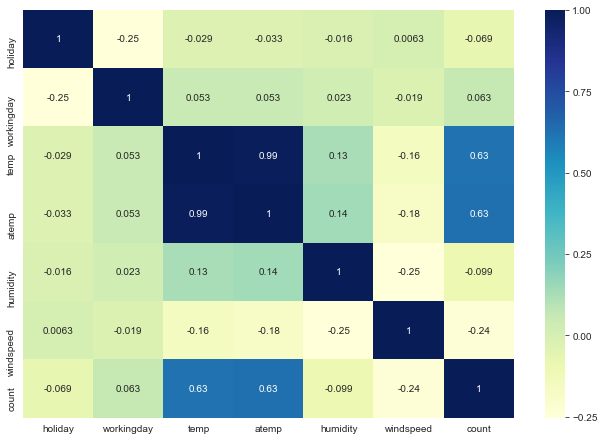

In [23]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')

#### Observation : It is seen that the variables 'temp' and 'atemp'  have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them . 

In [24]:
# Dropping the variable 'atemp' 
bikes=bikes.drop("atemp",axis=1)

## DATA PREPARATION :

### Creating Dummy Variables for the Categorical variables :
<font color=blue>month , season , weathersit , weekday</font>

In [25]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'

months= pd.get_dummies(bikes['month'],drop_first=True,prefix='month')

seasons = pd.get_dummies(bikes['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(bikes['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(bikes['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(bikes['year'],drop_first=True,prefix='year')

In [26]:
# Add the above created dummy variables to the original bikes dataframe
bikes = pd.concat([bikes,months,seasons,weather,weekdays,years], axis = 1)

# Looking at the top rows of our dataframe.
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,1,0,0,0,0
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,0
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# As we have created dummy variables for the categorical variables , now we will drop those categorical variables .

bikes.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [28]:
# Looking at the shape of dataframe after dropping the above variables
bikes.shape

(730, 29)

### Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
#Looking at the shape of the train dataset.
bikes_train.shape

(510, 29)

In [31]:
#Looking at the shape of the test dataset.
bikes_test.shape

(219, 29)

### Scaling the Features 

For Scaling the features in our bikes dataset , we will use `MinMax scaling`.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Dividing into X and Y sets for the model building :

In [34]:
y_train = bikes_train.pop('count')
X_train = bikes_train

## Data Modelling and Evaluation

#### We will be using the `Mixed Approach` for model building ie., firstly we will select 15 variables by using the `Automated Approach of RFE` and then using `Manual Approach for removing variables one by one based on the Pvalues and VIF values.` 

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive Feature Elimination which is a utility from sklearn)

### RFE
`Recursive feature elimination`

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

# rfe_support_ : tells whether RFE selected the variable or not
# rfe.ranking_ : tells the next best variable to be selected and ranks accordingly , The numbers 
#                 beside the variables indicate the importance of that variable.

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 2),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 5),
 ('month_Nov', False, 3),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weather_light rain & snow', True, 1),
 ('weather_mist & cloudy', True, 1),
 ('day_Monday', False, 8),
 ('day_Saturday', True, 1),
 ('day_Sunday', True, 1),
 ('day_Thursday', False, 10),
 ('day_Tuesday', False, 7),
 ('day_Wednesday', False, 12),
 ('year_2019', True, 1)]

In [38]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'month_Jan',
       'month_Jul', 'month_Sep', 'season_spring', 'season_winter',
       'weather_light rain & snow', 'weather_mist & cloudy', 'day_Saturday',
       'day_Sunday', 'year_2019'],
      dtype='object')

In [39]:
# Looking at the cols that were not selected by RFE
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'season_summer', 'day_Monday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

### Model - 1

In [43]:
#Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.15e-190
Time:                        05:20:31   Log-Likelihood:                 513.44
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     495   BIC:                            -933.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 1 , we have **`15 variables`** with **`R-squared value= 84.5%`**

**Considering significance level of 0.05(5%) ,from the above model we see the Pvalue for `holiday` variable is very high , which makes it insignificant and therefore we can drop it .**

In [44]:
#  Dropping the variable 'holiday'
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

Rebuilding the model without `holiday`

### Model - 2

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.03e-190
Time:                        05:20:32   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 2 , we have **`14 variables`** with **`R-squared value= 84.5%`**

**In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.**

### VIF (Variable Inflation Factor) Calculation

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.18
1,workingday,9.07
12,day_Saturday,6.06
13,day_Sunday,5.74
2,temp,3.19
8,season_spring,2.72
3,humidity,1.90
9,season_winter,1.81
11,weather_mist & cloudy,1.57
5,month_Jan,1.55


We see that the VIF value for the 'const' is very high , so we will drop the `const`.

In [47]:
# Dropping the const variable
X_train_new = X_train_new.drop(["const"], axis = 1)

Rebuilding the model without `const`

### Model - 3

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.03e-190
Time:                        05:20:32   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 3 , we have **`14 variables`** with **`R-squared value= 84.5%`**

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### Checking for VIFs again

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,29.73
1,temp,18.10
0,workingday,17.04
11,day_Saturday,4.60
3,windspeed,4.55
12,day_Sunday,4.47
7,season_spring,3.11
10,weather_mist & cloudy,2.28
8,season_winter,2.18
13,year_2019,2.09


We see that the VIF value for the variable 'humidity' is very high so we are going to drop `humidity` variable.

In [50]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

Rebuilding the model without `humidity`

### Model - 4

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.12e-188
Time:                        05:20:32   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 4 , we have **`13 variables`** with **`R-squared value= 84.1%`**

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### Checking for VIFs again

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,13.48
1,temp,12.76
2,windspeed,4.51
10,day_Saturday,3.85
11,day_Sunday,3.60
6,season_spring,2.85
12,year_2019,2.07
7,season_winter,1.79
3,month_Jan,1.65
9,weather_mist & cloudy,1.58


In the above model, the variable 'workingday' is having high Pvalue , therefore we drop `workingday`.

In [53]:
# Dropping the 'workingday' variable
X_train_new = X_train_new.drop(["workingday"], axis = 1)

Rebuilding the model without `workingday`

### Model - 5

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.99e-186
Time:                        05:20:33   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 5 , we have **`12 variables`** with **`R-squared value= 83.6%`**

The variable 'day_Saturday' has a high p value , therefore we will drop `day_Saturday`.

In [55]:
# Dropping the 'day_Saturday' variable
X_train_new = X_train_new.drop(["day_Saturday"], axis = 1)

Rebuilding the model without `day_Saturday`

### Model - 6

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.08e-187
Time:                        05:20:33   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 6 , we have **`11 variables`** with **`R-squared value= 83.5%`**

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### Checking for VIFs again

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.69
1,windspeed,4.01
5,season_spring,2.25
10,year_2019,2.06
2,month_Jan,1.60
8,weather_mist & cloudy,1.53
6,season_winter,1.40
3,month_Jul,1.36
4,month_Sep,1.20
9,day_Sunday,1.17


Removing one more variable `month_Jan`. 

In [58]:
# Dropping the 'month_Jan' variable
X_train_new = X_train_new.drop(["month_Jan"], axis = 1)

Rebuilding the model without `month_Jan`

### Model - 7

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.06e-186
Time:                        05:20:33   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 7 , we have **`10 variables`** with **`R-squared value= 83.3%`**

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### Checking for VIFs again

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.67
1,windspeed,4.00
9,year_2019,2.06
4,season_spring,1.65
7,weather_mist & cloudy,1.51
5,season_winter,1.40
2,month_Jul,1.35
3,month_Sep,1.20
8,day_Sunday,1.17
6,weather_light rain & snow,1.08


Removing one more variable `month_Sep`. 

In [61]:
# Dropping the 'month_Sep' variable
X_train_new = X_train_new.drop(["month_Sep"], axis = 1)

Rebuilding the model without `month_Sep`

### Model - 8

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.42e-185
Time:                        05:20:34   Log-Likelihood:                 489.23
No. Observations:                 510   AIC:                            -958.5
Df Residuals:                     500   BIC:                            -916.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

For the model 8 , we have **`9 variables`** with **`R-squared value= 82.9%`**

### Checking for VIFs again

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.25
1,windspeed,3.96
8,year_2019,2.06
3,season_spring,1.64
6,weather_mist & cloudy,1.51
4,season_winter,1.40
2,month_Jul,1.31
7,day_Sunday,1.17
5,weather_light rain & snow,1.08


#### From the above model ,we see that the Pvalues of all the 9 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable.

##### We will now see the F-Statistic value .

### F-Statistics

`F-Statistics is used for testing the overall significance of the Model.`

High value for the F-Statistics means the model is more significant and vice-versa.

* `F-statistic: 269.8`
* `Prob (F-statistic):  1.42e-185`

#### The F-Statistics value of 269.8 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.

#### So we can conclude it as our final model with 9 variables .

#### Model 8 is our final model with :
#### * `R-squared for training set` : <font color= blue>       0.829 ( 82.9% approx equal to 83% )</font>
#### * `Adj R-squared for training set`: <font color= blue> 0.826 ( 82.6 %)</font>

**R-squared = 82.9 which means that 82.9 % of the variance for the target variable ie., '`count`'  is explained by the predictor variables , and hence we say that it is a good model.**

**From the coefficients that we get for the variables, our `linear regression equation` becomes:**

**Count** =  0.2564 + 0.4672 X *`temp`* - 0.1489 X *`windspeed`* + 0.2339 X *`year_2019`* - 0.0804 X *`month_Jul`*  -              0.1144 X *`season_spring`* + 0.0455 X *`season_winter`* - 0.2822 X *`weather_light rain & snow`* - 0.0797 X            *`weather_mist & cloudy`* - 0.0454 X *`day_Sunday`* 

#### Checking the Linearity Assumption for the above model :

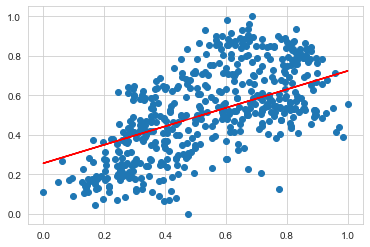

In [64]:
# Let's visualise the data with a scatter plot and the fitted regression line
# for the temp' variable in the model.
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.2564 + 0.4672*X_train_lm.iloc[:, 1], 'r')
plt.show()

From above graph for `temp` variable , since the **regression line fits linearly** and has **positive correlation** with the target variable , we can say that our linearity assumption holds true.

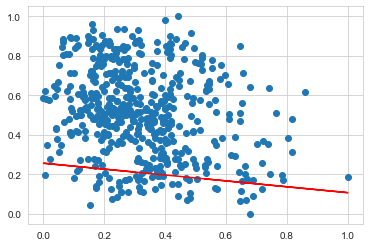

In [65]:
# Let's visualise the data with a scatter plot and the fitted regression line 
# for the 'windspeed' variable in the model.
plt.scatter(X_train_lm.iloc[:, 2], y_train)
plt.plot(X_train_lm.iloc[:, 2], 0.2564 - 0.1489*X_train_lm.iloc[:, 2], 'r')
plt.show()

From above graph for `windspeed` variable , the regression fitted line shows that it has **negative correlation** with the target variable , we can say that our linearity assumption holds true.

## Residual Analysis of the training set

Now we will try to check one of the major assumptions of the linear regression ie., checking whether the error terms are normally distributed by plotting a histogram of the error terms and see what it looks like.

In [66]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

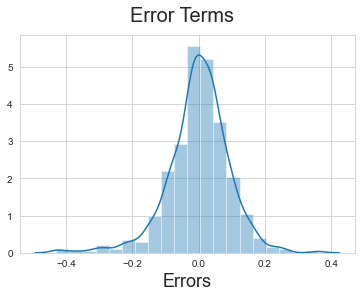

In [67]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)      

**Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.**

## Making Predictions

### Applying the scaling on the test set also

In [68]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_test[vars] = scaler.transform(bikes_test[vars])

### Dividing into X_test and y_test

In [69]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [70]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_new)

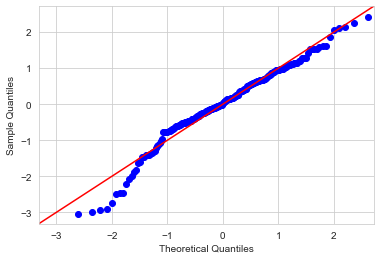

In [72]:
# Plotting a Q-Q plot to assess if the difference between 
# actual and predicted values belong to Normal distribution.
diff=y_test-y_pred
sm.qqplot(diff,fit=True,line='45')
plt.show()

 We see that all the point of quartiles lies on or close to straight line at an angle of 45 degree from x-axis therefore they came from  Normal distribution.

## Model Evaluation

Text(0, 0.5, 'y_pred')

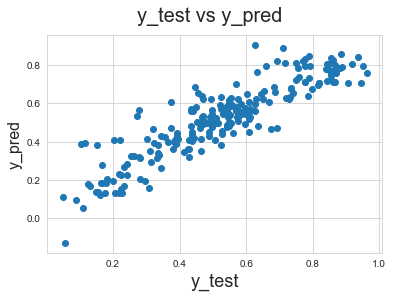

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

### Calculating R-squared value for Test set

In [74]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.805152207051925

### Calculating Adj. R-squared value for Test set

In [75]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7957845246986521

In [76]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0729150877915259
MSE: 0.009254453392367905
RMSE: 0.0962000696068766


### Comparison between the results on Train and Test datasets:

* `R-squared Value`:<br><br>
    * **Train set : <font color=blue>82.9% </font>** 
    * **Test set : <font color=blue>80.5% </font>**
<br><br>

* `Adj R-squared Value`:<br><br>
     * **Train set : <font color=blue>82.6%</font>**
     * **Test set : <font color=blue>79.5%</font>**

* As we can see that the **difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model** . 

* As we can see that the **difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model** . 

#### Mean Squared Error = <font color=blue>0.00925</font>

#### Root  Mean Squared Error =  <font color=blue>0.0962</font>

### Reporting the Final Model:


**From the coefficients that we get for the variables, our `linear regression equation` becomes:**

**Count** =  0.2564 + 0.4672 X *`temp`* - 0.1489 X *`windspeed`* + 0.2339 X *`year_2019`* - 0.0804 X *`month_Jul`*  -              0.1144 X *`season_spring`* + 0.0455 X *`season_winter`* - 0.2822 X *`weather_light rain & snow`* - 0.0797 X            *`weather_mist & cloudy`* - 0.0454 X *`day_Sunday`* 

#### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temp** variable is associated with an **increase of 0.4672 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **windspeed** variable is associated with a **decrease of 0.1489 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **year_2019** variable is associated with an **increase of 0.2339 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **month_Jul** variable is associated with a **decrease of 0.0804 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **season_spring** variable is associated with a **decrease of 0.1144 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **season_winter** variable is associated with an **increase of 0.0455 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **weather_light rain & snow** variable is associated with a **decrease of 0.2822 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **weather_mist & cloudy** variable is associated with a **decrease of 0.0797 total bike rental counts**.
- Holding all other features fixed, a 1 unit increase in **day_Sunday** variable is associated with a **decrease of 0.0454 total bike rental counts**.

### Recommendations :

From the regression model above , we have the following variables which are significant in predicting the demand for shared bikes:

**temp, windspeed, year_2019, month_Jul , season_spring, season_winter , weather_light rain or snow , weather_mist and cloudy , day_Sunday.**

#### The company can focus on the following factors to estimate the rental counts :
* As the **temperature increases i.e. its gets hotter the count of bike rental increases and for cold temperature there is a decrease in count of bike rental.**
* As the **windspeed increases , the count of bike rental decreases and at low windspeed , the count of rental bikes would increase.**
* Bike rental counts have been **increasing over the years , it increased from 2018 to 2019 , and is expected to increase in the coming years.**
* Bike rental counts are going to **decrease in the month of July**.
* Bike rental counts are going to **decrease in the spring season** .
* Bike rental counts are going to **increase in the season winter** .
* Bike rental counts are going to **decrease when there would be light rain and snow in the weather**.
* Bike rental counts are going to **decrease when the weather is going to be mist and cloudy**.
* Bike rental counts are going to **decrease on Sunday as bikes are mostly used for travelling to work so it is used more during the workdays as compared to holidays or weekends**.


**In order to find out `increase in the demand for shared bikes`, it is recommended for the company to focus on the following features  :**

* **temperature**
* **year**
* **season winter**

**as an increase in these features is going to increase the demand for shared bikes.**